In [6]:
import os
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import seaborn as sns # I love this package!
#sns.set_style('white')

import torch

### Loss Trend Check

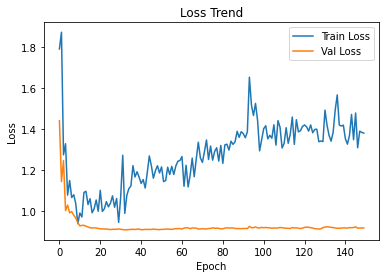

In [7]:
# load check point
model_path = 'checkpoint.pth.tar'
checkpoint = torch.load(model_path)
loss_history_train = checkpoint['loss_history_train']
loss_history_val = checkpoint['loss_history_val']
#loss_train = [np.mean(l) for l in loss_history_train]
loss_train = [float(torch.mean(torch.stack(l))) for l in loss_history_train]
#loss_val = [np.mean(l) for l in loss_history_val]
loss_val = [float(torch.mean(torch.stack(l))) for l in loss_history_val]

plt.plot(loss_train, label = 'Train Loss')
plt.plot(loss_val, label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Trend')
plt.legend()
plt.show()

In [5]:
#float(loss_history_train[1][0])
#torch.mean(torch.stack(loss_history_train[0]))

loss_val

[1.4748250246047974,
 1.1737606525421143,
 1.092380166053772,
 1.0110156536102295,
 0.9872830510139465,
 0.9779213666915894,
 0.9573835134506226,
 0.9407739639282227,
 0.9381210803985596,
 0.935753583908081,
 0.9318824410438538,
 0.9259194135665894,
 0.923027515411377,
 0.9182840585708618,
 0.9141230583190918,
 0.9108971953392029,
 0.9103321433067322,
 0.9087064266204834,
 0.9075396656990051,
 0.9071745872497559,
 0.9071373343467712,
 0.9072882533073425,
 0.9065802097320557,
 0.9066886901855469,
 0.9063018560409546,
 0.9072182178497314,
 0.9064428806304932,
 0.9055215716362,
 0.9066596031188965,
 0.9041379690170288,
 0.9058658480644226,
 0.9050233960151672,
 0.9047757983207703,
 0.9072738885879517,
 0.9063917994499207,
 0.9074757695198059,
 0.9058949947357178,
 0.9072723984718323,
 0.9077574014663696,
 0.906537652015686,
 0.9069039225578308,
 0.9074987769126892,
 0.9064675569534302,
 0.9060595035552979,
 0.9066215753555298,
 0.9058504104614258,
 0.9060617089271545,
 0.9051671624183655,

### Model performance

In [8]:
model_path = 'model_best.pth.tar'
# calculate outputs for the test data with our best model
output_csv_path = 'pred.csv'
command = ('python pred.py '
           '--img_dir /UCLA-protest/img/test/ '
           '--output_csvpath {csv_path} '
           '--model {model} --batch_size 4 --cuda'
           .format(csv_path = output_csv_path, model = model_path))

            
#!{command}

# load prediction
df_pred = pd.read_csv(output_csv_path)
df_pred['imgpath'] = df_pred['imgpath'].apply(os.path.basename)

# load target
test_label_path = '/UCLA-protest/annot_test.txt'
df_target = pd.read_csv(test_label_path, delimiter= '\t')

In [9]:
#python pred.py --img_dir /UCLA-protest/img/test/ --output_csvpath pred.csv --model model_best.pth.tar --batch_size 4 --cuda
torch.load('model_best.pth.tar')

{'epoch': 33,
 'state_dict': OrderedDict([('conv1.weight',
               tensor([[[[ 1.2872e-02,  1.4179e-02, -1.6076e-02,  ..., -4.1880e-02,
                          -4.4399e-02, -7.2072e-02],
                         [ 4.2953e-03,  5.9857e-03,  1.4930e-02,  ...,  1.9335e-03,
                          -2.1476e-02, -3.9054e-02],
                         [ 2.2449e-02,  2.3597e-02,  1.5996e-02,  ...,  1.0255e-01,
                           6.2259e-02,  5.1518e-02],
                         ...,
                         [-7.9766e-04,  2.7756e-02, -1.0110e-02,  ..., -1.2738e-01,
                          -7.6915e-02,  7.5423e-03],
                         [ 3.6099e-03,  4.8117e-02,  6.2127e-02,  ...,  2.4124e-02,
                          -3.3962e-02, -1.5994e-02],
                         [-7.9984e-02, -3.2092e-02, -1.7769e-02,  ...,  3.5192e-02,
                           2.2129e-02,  1.4802e-03]],
               
                        [[-1.9130e-02,  1.0713e-02,  2.2961e-02,  ...,  

#### Binary Variables

In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
def plot_roc(attr, target, pred):
    """Plot a ROC curve and show the accuracy score and the AUC"""
    fig, ax = plt.subplots()
    auc = roc_auc_score(target, pred)
    acc = accuracy_score(target, (pred >= 0.5).astype(int))
    fpr, tpr, _ = roc_curve(target, pred)
    plt.plot(fpr, tpr, lw = 2, label = attr.title())
    plt.legend(loc = 4, fontsize = 15)
    plt.title(('ROC Curve for {attr} (Accuracy = {acc:.3f}, AUC = {auc:.3f})'
               .format(attr = attr.title(), acc= acc, auc = auc)),
              fontsize = 15)
    plt.xlabel('False Positive Rate', fontsize = 15)
    plt.ylabel('True Positive Rate', fontsize = 15)
    plt.show()
    return fig

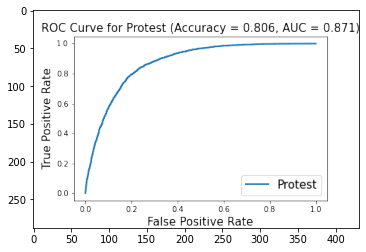

In [11]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/home/ac8839/1006_Capstone_Project/src/won-et-al/files/protest.png', 'r')
imshow(np.asarray(pil_im))

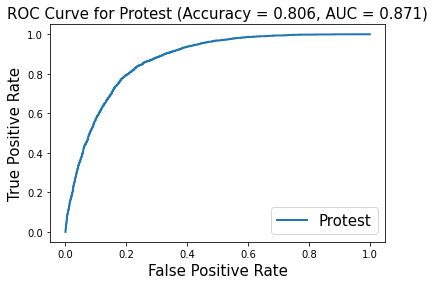

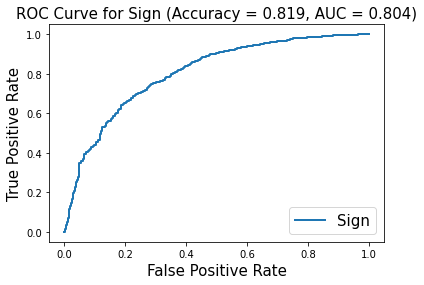

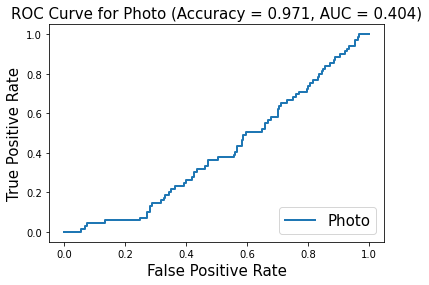

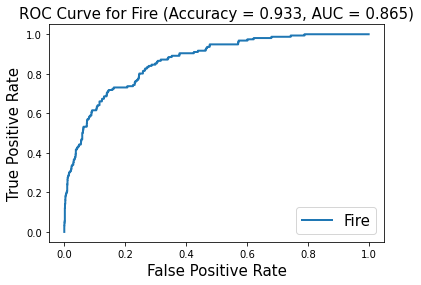

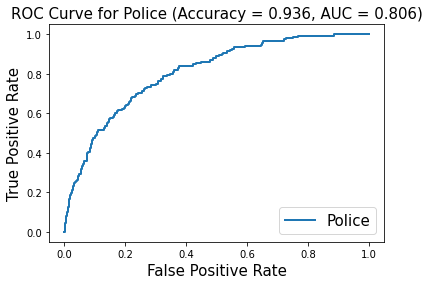

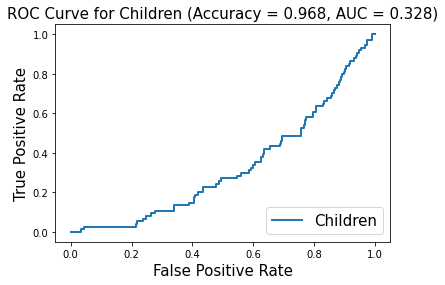

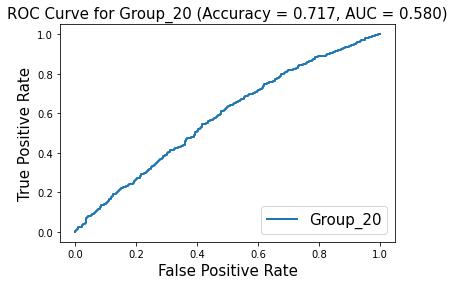

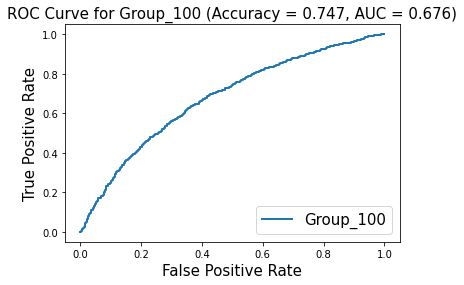

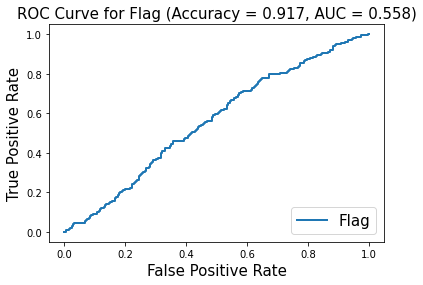

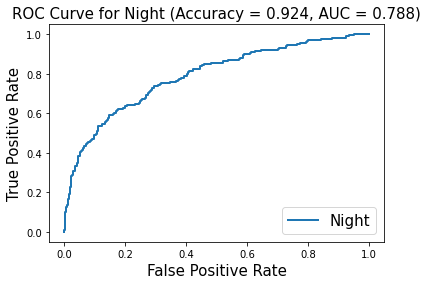

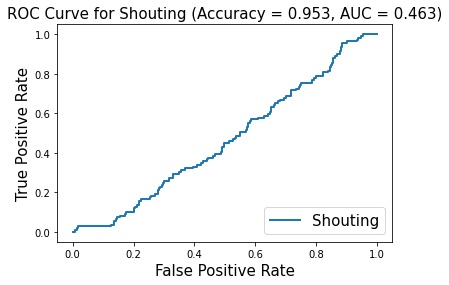

In [12]:
# plot ROC curve for protest
attr = "protest"
target = df_target[attr]
pred = df_pred[attr]
fig = plot_roc(attr, target, pred)
fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))
# plot ROC curves for visual attributes
for attr in df_pred.columns[3:]:
    target = df_target[attr]
    pred = df_pred[attr][target != '-']
    target = target[target != '-'].astype(int)
    fig = plot_roc(attr, target, pred)
    fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))

#### Violence

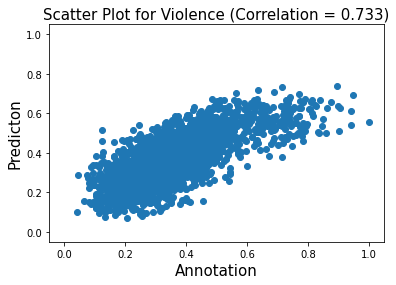

In [13]:
import scipy.stats as stats
attr = 'violence'
pred = df_pred[df_target['protest'] == 1][attr].tolist()
target = df_target[df_target['protest'] == 1][attr].astype(float).tolist()
fig, ax = plt.subplots()
plt.scatter(target, pred, label = attr.title())
plt.xlim([-.05,1.05])
plt.ylim([-.05,1.05])
plt.xlabel('Annotation', fontsize = 15)
plt.ylabel('Predicton', fontsize = 15)
corr, pval = stats.pearsonr(target, pred)
plt.title(('Scatter Plot for {attr} (Correlation = {corr:.3f})'
            .format(attr = attr.title(), corr= corr)), fontsize = 15)
plt.show()
fig.savefig(os.path.join('/home/ac8839/1006_Capstone_Project/src/won-et-al/files', attr+'.png'))